In [11]:
def eval_to_numeric(x):
        if x=='Très satisfaisant':   return 1
        if x=='Satisfaisant': return 2
        if x=='A améliorer': return 3
        if x=='A corriger de manière urgente': return 4

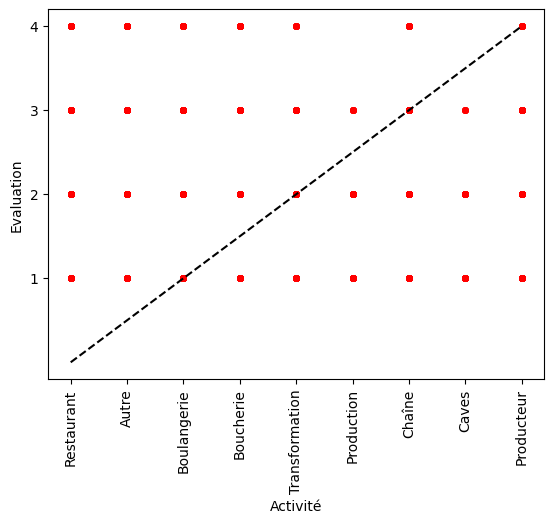

In [38]:
# On importe les librairies dont on aura besoin pour ce tp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#On charge le dataset
house_data = pd.read_csv('export_alimconfiance@dgal.csv', sep=';')
#house_data = house_data[house_data['loyer'] < 10000]

#définir le nom des colonnes
analysed = "Synthese_eval_sanit"
analysing = "APP_Libelle_activite_etablissement"

#convertion des eval
house_data[analysed] = house_data[analysed].apply(eval_to_numeric)
#convertion des activités
house_data[analysing] = house_data[analysing].apply(to_category)

# # On décompose le dataset et on le transforme en matrices pour pouvoir effectuer notre calcul
# X = np.matrix( [np.ones (house_data.shape[0]), house_data[analysing].values]).T
# y= np.matrix(house_data[analysed]).T

# # On effectue le calcul exact du paramètre theta
# theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot (y)

# Convertir la colonne analysing en codage one-hot
one_hot = pd.get_dummies(house_data[analysing])
X = np.hstack((np.ones((house_data.shape[0], 1)), one_hot))

# Convertir la colonne analysed en une matrice 2D
y = np.matrix(house_data[[analysed]])

# Calculer theta
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)


plt.xlabel('Activité') 
plt.ylabel('Evaluation')

plt.plot(house_data[analysing], house_data[analysed], 'ro', markersize=4)

# On affiche la droite entre 0 et 5
# plt.plot([0,5], [theta.item(0), theta.item(0) + 5 * theta.item(1)], linestyle='--', c='#000000')
plt.plot([0,8], [0, 4], linestyle='--', c='#000000')
plt.xticks(rotation = 90)
plt.yticks([1, 2, 3, 4])

plt.show()